In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel("1000 leads.xlsx")
data.head()

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [3]:
data.shape


(1001, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           1001 non-null   object
 1   Location            980 non-null    object
 2   Status              998 non-null    object
 3   Status information  977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [5]:
# checking for null values
data.isnull().sum()

Lead Name              0
Location              21
Status                 3
Status information    24
dtype: int64

In [6]:
# checkig for duplicate values
data.duplicated().sum()

0

# EDA

In [7]:
data.columns


Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [8]:
data['Status '].value_counts()

Not Converted    856
Converted        124
NOt Converted     11
Conveted           7
Name: Status , dtype: int64

In [9]:
 data['Status '].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan, 'Conveted'],
      dtype=object)

In [10]:
data['Status '].replace({"NOt Converted": "Not Converted", "Conveted": "Converted "}, inplace=True)
data['Status '].value_counts()

Not Converted    867
Converted        131
Name: Status , dtype: int64

Data is imbalanced, we gotta balance it

In [11]:
# lead name
len(data["Lead Name"].unique())

878

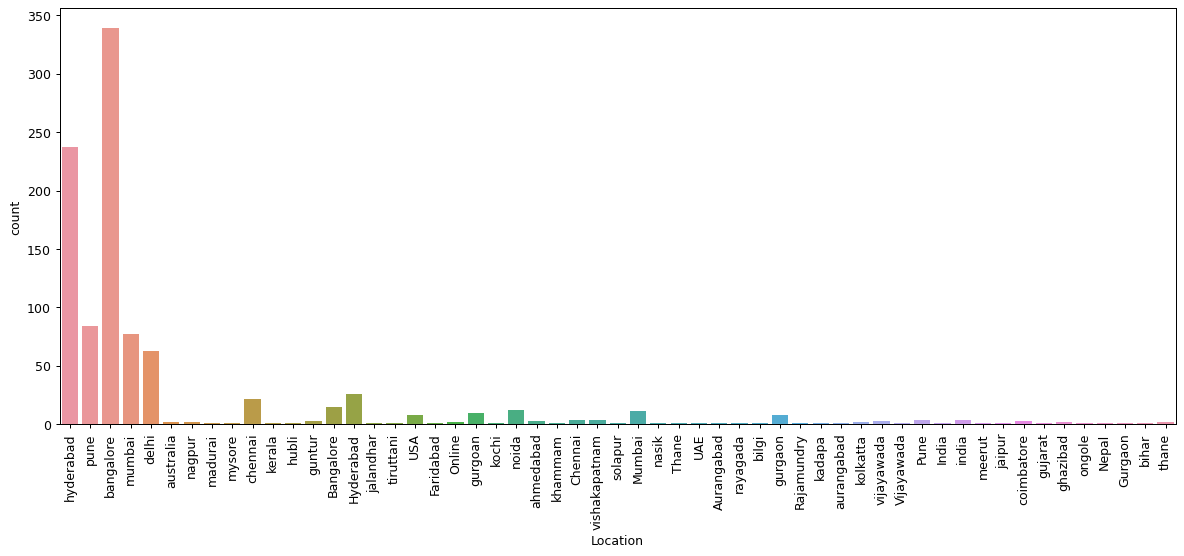

In [12]:
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=data, x="Location")
plt.xticks(rotation="vertical")
plt.show()

Fixing the null values in location with mode


In [13]:
data.loc[data["Location"].isnull(), "Location"] = data["Location"].mode()[0]

In [14]:
data["Location"].mode()[0]

'bangalore'

In [15]:
# lower casing the location column
data["Location"] = data["Location"].apply(lambda x: x.lower())

In [16]:
# fetching country function
def country(x):
  if x == "australia":
    return "australia"
  elif x == "usa":
    return "usa"
  elif x == "uae":
    return "uae"
  else:
    return "india"

In [17]:
data["Country"] = data["Location"].apply(country)

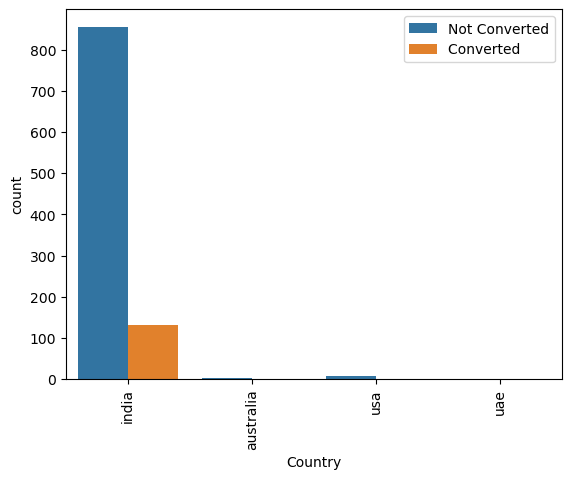

In [18]:
sns.countplot(data=data, x="Country",hue="Status ")
plt.legend(loc="upper right")
plt.xticks(rotation="vertical")
plt.show()

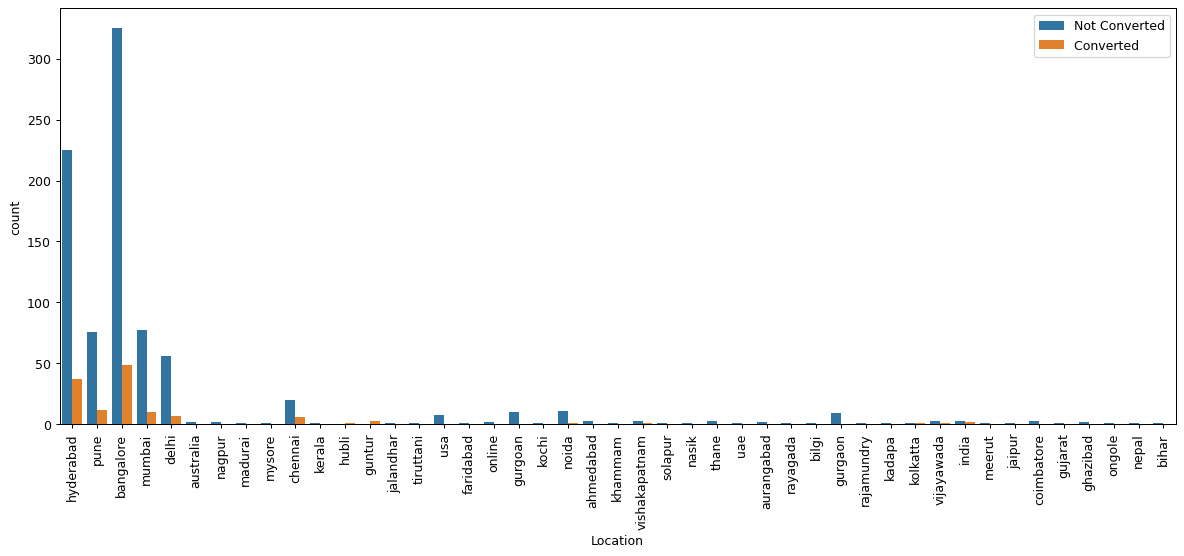

In [19]:
# lets find out what locations have more num of converted/non converted rate
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=data, x="Location", hue="Status ")
plt.xticks(rotation="vertical")
plt.legend(loc="upper right")
plt.show()

In [20]:
data.head()

,Lead Name,Location,Status,Status information,Country
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",india
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",india
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,india
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,india
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india


In [21]:
data['Status information'].isnull().sum()

24

In [27]:
#we will drop the row which will have null textual data
data.dropna(inplace=True)

In [28]:
data.isnull().sum()

Lead Name             0
Location              0
Status                0
Status information    0
Country               0
dtype: int64

In [29]:
data["num_char"]=data['Status information'].apply(lambda x: len(x))

<Figure size 1440x540 with 0 Axes>

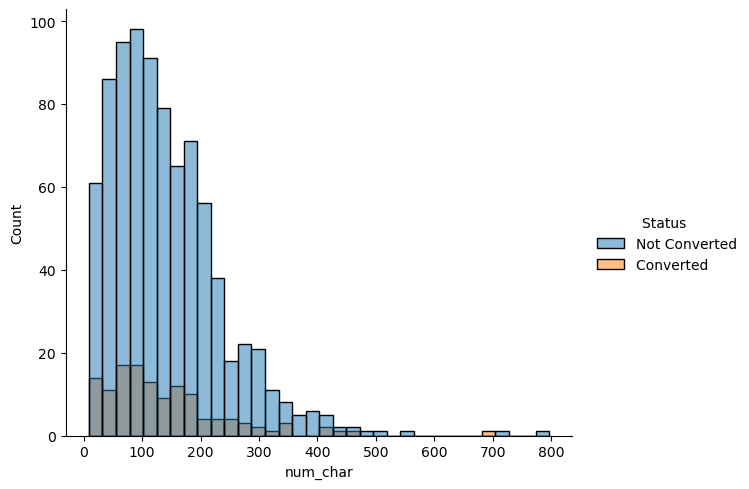

In [36]:
plt.figure(figsize=(16,6),dpi=90)
sns.displot(data=data, x="num_char",hue="Status ",aspect=1.2)
plt.show()

In [37]:
# lets try to find the num of words per converstation
import nltk

In [38]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
for i in data['Status information'][:15]:
    print(i)

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
16|AuG|moHan:rnr
14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested
14/8/17(Surendra):asking code
11|aUg|moHan:mail shred for ML Tensorflow corprt 16|AuG|moHan:shared but rnr
11|AuG|moHan:askng code
11/8/prema: RNR 11/8/prema: share me tableau recorded session check n revert 12/8/prema: not reachable 14/8/prema: RNR 16/8/prema: have rotational shifts, will check details n co

In [41]:
import string
punctuation_word= string.punctuation

In [42]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [43]:
# custom stopwords where you will have negative words as well
stop_words2 = [i for i in stop_words if i not in ["not","no", "nor","don't", "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "haven't",
 "isn't",
 "mightn't",
 "mustn't",
 "needn't",
 "shouldn't",
 "wasn't",
 "weren't",
 "won't",
 "wouldn't" ]]

In [45]:
data["num_words"] = data["Status information"].apply(lambda x : len([i for i in nltk.word_tokenize(x) if i not in punctuation_word]))

<Figure size 1080x540 with 0 Axes>

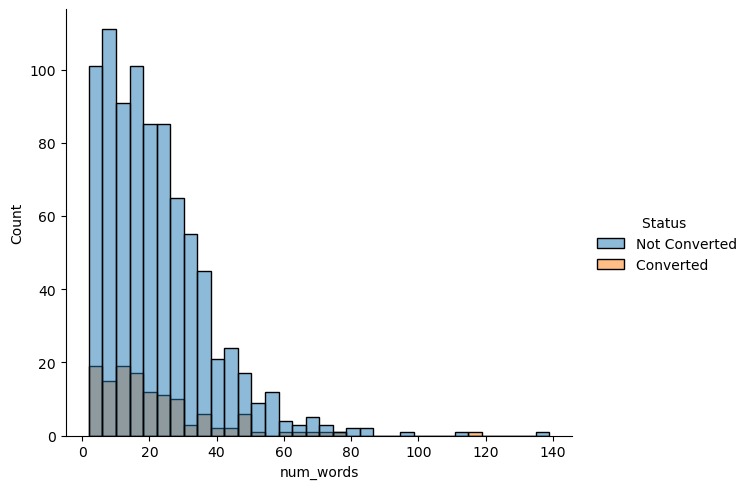

In [46]:
# how many words present in ppl go not converting
plt.figure(figsize=(12,6), dpi=90)
sns.displot(data=data, x="num_words", hue="Status ", aspect=1.2)
plt.show()

In [49]:
for i in data["Status information"][-10:-1]:
  print([x.lower() for x in nltk.word_tokenize(i) if x not in punctuation_word and x not in stop_words2])

['24/4/17', 'prema', 'cal', '5:30', '18/7/17', 'prema', 'enrolled', 'another', 'course']
['24/apr/mohan', 'not', 'reachble', '25/apr/mohan', 'rnr', '16/may/mohan', 'cal', 'not', 'cntcd', '7/7/17', 'gowtham', 'not', 'lokng', 'right']
['25/4/17', 'surendra', 'share', 'details', 'join', 'tomorrow', '27/4/17', 'surendra', 'join', 'morning', '6:30am', 'early', 'surendra']
['24/4/17', 'prema', 'shared', 'details', '25/4/17', 'prema', 'rnr', '9/5/17', 'prema', 'ct', 'shared', 'details', '12/5/17', 'gowtham', 'tim', 'nedded', '15/6/17', 'soma', 'call', 'disconnected']
['24/apr/mohan', 'rnr', '25/apr/mohan', 'rnr', '16/may/mohan', 'need', 'mrng', 'demo', '7/7/17', 'gowtham', 'enroled', 'wid', 'another', 'inst', 'alomost', 'completed', 'traning']
['25/4/17', 'surendra', 'please', 'send', 'details', 'tomorrow', 'afternoon', '12pm', 'discuss', '12/5/17', 'surendra', 'not', 'connected', '12/5/17', 'gowtham', 'not', 'intrsd']
['24/4/17', 'prema', 'need', 'ct', 'venue', 'far', 'shared', 'details', 'd

In [56]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
# for understanding the spell corrector 
from textblob import TextBlob

In [58]:
for i in data["Status information"][-10:-1]:
  txt = " ".join([x.lower() for x in nltk.word_tokenize(i) if x not in punctuation_word and x not in stop_words2])
  spell_check = TextBlob(txt)
  txt = spell_check.correct().string
  print(txt)

24/4/17 prima cal 5:30 18/7/17 prima enrolled another course
24/air/moran not readable 25/air/moran and 16/may/moran cal not catch 7/7/17 gowtham not long right
25/4/17 surendra share details join tomorrow 27/4/17 surendra join morning 6:am early surendra
24/4/17 prima shared details 25/4/17 prima and 9/5/17 prima it shared details 12/5/17 gowtham tim needed 15/6/17 some call disconnected
24/air/moran and 25/air/moran and 16/may/moran need man domo 7/7/17 gowtham enrolled wid another inst almost completed trading
25/4/17 surendra please send details tomorrow afternoon pm discuss 12/5/17 surendra not connected 12/5/17 gowtham not intra
24/4/17 prima need it venue far shared details is 25/4/17 prima want venue near banaswadi
24/air/moran intrusted long batch trail per 26/air/moran army red ever
1/5/17 surendra please share details 11/5/17 gowtham already done


TextBlob does a very pathetic job in correcting chat spellings

In [59]:
# with pyspellchecker
!pip install pyspellchecker

     ---------------------------------------- 2.5/2.5 MB 4.6 MB/s eta 0:00:00


In [60]:
from spellchecker import SpellChecker
sp=SpellChecker()

In [62]:
incorrect_words=sp.unknown(['rnr', 'rnr', 'need', 'mrng', 'demo', 'enroled', 'wid', 'another', 'inst', 'alomost', 'completed', 'traning'])

In [63]:
for i in incorrect_words:
    print(sp.correction(i))
    print(sp.candidates(i))

ming
{'mang', 'mong', 'ming', 'mung'}
training
{'craning', 'training', 'tracing', 'trading', 'traing'}
almost
{'almost'}
ist
{'irst', "ins't", 'ins', 'inset', "in't", 'int', 'ist'}
enrolled
{'enrolled'}
rne
{'ror', 'unr', 'rne'}



# Text Preprocessing

In [64]:
import re

In [65]:
data.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",india,133,18
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,india,16,2
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19


In [66]:
df=data.copy()

In [67]:
#label encoding the locations
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
df['Location']=le.fit_transform(df['Location'])

In [84]:
df["Status "].replace({"Not Converted": 1, "Converted ": 0}, inplace=True)


In [85]:
# 1 = Not converted 0 =Converted
df.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words,cleaned_txt
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18,share detail available evng postponed plan tra...
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27,cal tmrw shared detail email share detail emai...
2,Sapna Dewani,3,0,16|AuG|moHan:rnr,india,16,2,rnr
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13,want server cal busy reg server
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19,rnr gave info said revert hr planning next mon...


In [86]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shahe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shahe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [88]:
from nltk.stem import WordNetLemmatizer
lamma = WordNetLemmatizer()
def preprocess(txt):
    x = txt.lower()
    x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
    x = re.sub("int[a-z]+d$", "interested", x)
    x = re.sub("[\d+-?,'.]", "", x)
    x = [i for i in nltk.word_tokenize(x) if i not in stop_words2 and len(i)>1 and i not in punctuation_word] 
    x = [lamma.lemmatize(i) for i in x] 
    return " ".join(x)

In [89]:
for i in data["Status information"][:12]:
    print(i)

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
16|AuG|moHan:rnr
14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested
14/8/17(Surendra):asking code
11|aUg|moHan:mail shred for ML Tensorflow corprt 16|AuG|moHan:shared but rnr
11|AuG|moHan:askng code
11/8/prema: RNR 11/8/prema: share me tableau recorded session check n revert 12/8/prema: not reachable 14/8/prema: RNR 16/8/prema: have rotational shifts, will check details n co

In [90]:
for i in data["Status information"][:12]:
    print(preprocess(i))

share detail available evng postponed plan training currently not interested
cal tmrw shared detail email share detail email check revert received email im looking asq certification
rnr
want server cal busy reg server
rnr gave info said revert hr planning next month share detail
check demo attended demo get back think respond not interested
asking code
mail shred ml tensorflow corprt shared rnr
askng code
rnr share tableau recorded session check revert not reachable rnr rotational shift check detail confirm rnr confirm tmrw rnr share detail webinar rd
call pm om meeting cal later rnr webinar weekend shared detail d rnr
im medication back wk ct comfortable share bangalore ofc address home insist join classroom rnr soma want classroom training


In [91]:
df["cleaned_txt"]=df["Status information"].apply(preprocess)

now that we have cleaned the txt, lets correct few specific spellings

In [92]:
df.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words,cleaned_txt
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18,share detail available evng postponed plan tra...
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27,cal tmrw shared detail email share detail emai...
2,Sapna Dewani,3,0,16|AuG|moHan:rnr,india,16,2,rnr
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13,want server cal busy reg server
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19,rnr gave info said revert hr planning next mon...


In [98]:
for i in df["cleaned_txt"][30:40]:
    print(i)

cacl latr rnr soma asked call tomorrow
call pm iam college iam class
detail shared rnr didnt go mail go revert detail shared soma not interested
detaills shared said next month
shared detail not reachable not right time talk cal evng tied agency
rnr rnr cald many time rnr not interested
rnr rnr call min check evening pm not interested
u number
rnr rnr
need reg clsroom try satdy demo rnr rnr rnr rnr


# Dealing with imbalance data

In [99]:
df['Status '].value_counts()

1    845
0    129
Name: Status , dtype: int64

In [101]:
from sklearn.utils import resample
df_1=df[df["Status "]==1]
df_0=df[df["Status "]==0]
df_0_upsampled = resample(df_0, replace=True,n_samples=600, random_state=20)
df_upsampled= pd.concat([df_1,df_0_upsampled],axis=0)

In [102]:
df_upsampled["Status "].value_counts()

1    845
0    600
Name: Status , dtype: int64

# Word Cloud

In [103]:
def word_freq(x):
    lst = []
    for word in x.split():
        lst.extend(word)
    words = pd.Series(lst)
    return words

In [104]:
words_freq = word_freq(df[df["Status "]==1]["cleaned_txt"].str)

In [105]:
top_words = words_freq.value_counts().reset_index()[:30]


In [106]:
top_words.head()

,index,0
0,rnr,1084
1,detail,439
2,not,377
3,call,364
4,shared,310


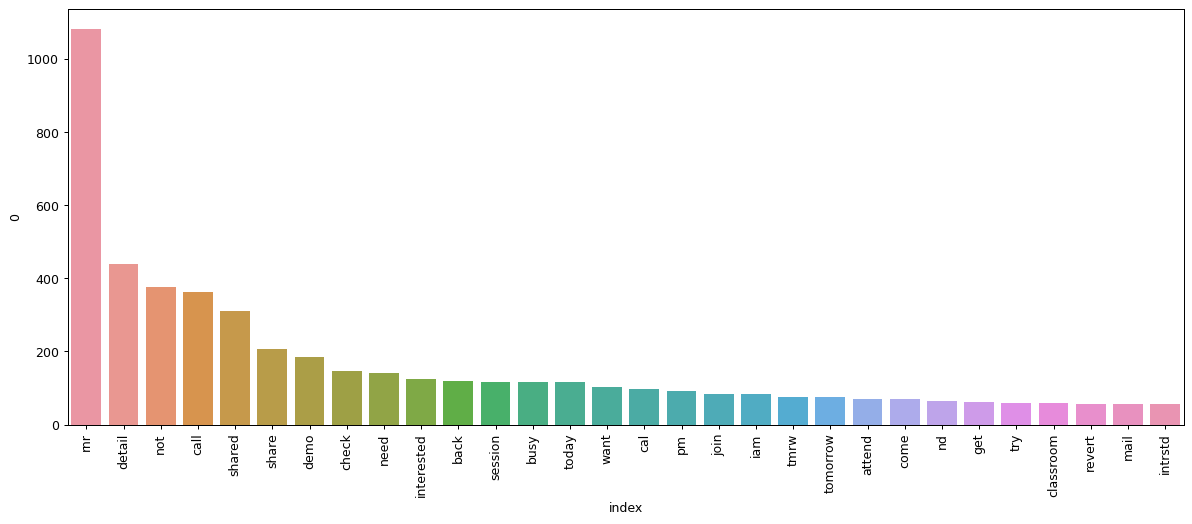

In [107]:
plt.figure(figsize=(16,6),dpi=90)
sns.barplot(data=top_words, x="index", y=0)
plt.xticks(rotation="vertical")
plt.show()


In [109]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00


In [110]:
from wordcloud import WordCloud 

In [113]:
wc=WordCloud(width= 1200, height=800, max_words=30)
not_converted_wc = wc.generate(df[df["Status "]==1]["cleaned_txt"].str.cat(sep=" "))

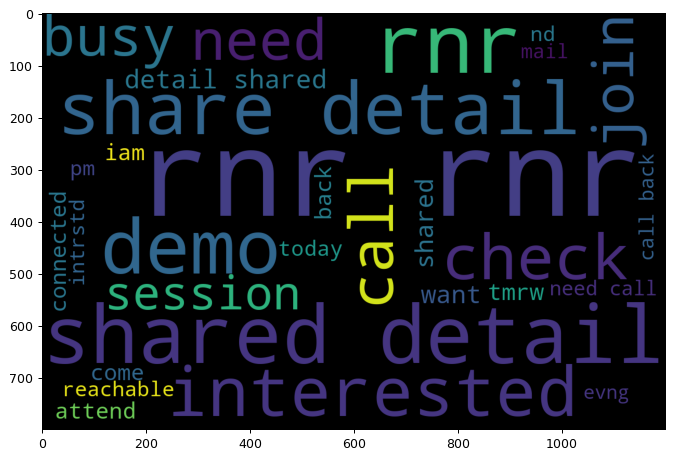

In [114]:
plt.figure(figsize=(12,6),dpi=90)
plt.imshow(not_converted_wc)
plt.show()

In [116]:
converted_wc=wc.generate(df[df["Status "]==0]["cleaned_txt"].str.cat(sep=" "))

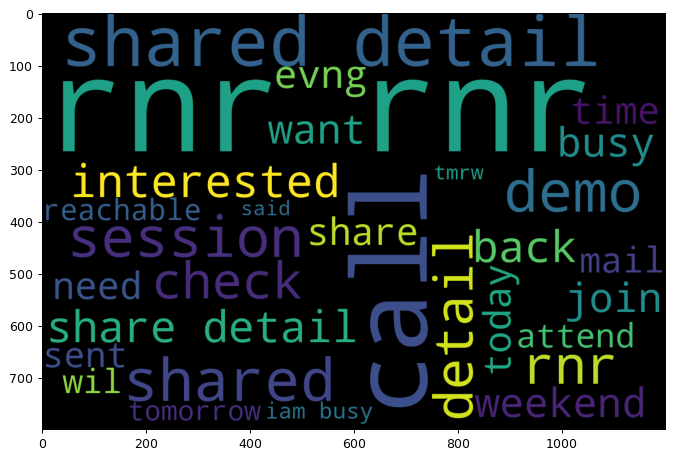

In [117]:
plt.figure(figsize=(12,6),dpi=90)
plt.imshow(converted_wc)
plt.show()

# Task 1 Topic Modeling

In [118]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
cv = CountVectorizer(max_features=500, ngram_range=(2,2))

In [119]:
vector_txt = cv.fit_transform(df_upsampled["cleaned_txt"])

In [120]:
from sklearn.decomposition import LatentDirichletAllocation

In [121]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=5)

In [122]:
lda_top = lda_model.fit_transform(vector_txt)

In [123]:

print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  59.69289986299935 %
Topic  1 :  40.30710013700066 %


In [124]:
topics = dict()
vocab = cv.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:9]
     tp = "Topic "+str(i)+": "
     topics[tp] = []
     for t in sorted_words:
       topics[tp].append(t[0])

C:\Users\shahe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
# now we understand what topics will have what words that are being considered
for k,v in topics.items():
  print(f"{k} : {v}")

Topic 0:  : ['rnr rnr', 'shared detail', 'not interested', 'rnr call', 'detail rnr', 'share detail', 'get back', 'rnr shared', 'not connected']
Topic 1:  : ['shared detail', 'share detail', 'detail shared', 'let know', 'coverage area', 'cal back', 'iam not', 'demo detail', 'detail check']


In [126]:
df["Status "][0]


1

In [127]:
# lets check for document 1
print("Document 1: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 1: 
Topic  0 :  30.116018275551287 %
Topic  1 :  69.8839817244487 %


In [128]:
print(df["Status information"][1])
print(df["Status "][1])

14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
1


In [129]:
# lets check for document 2
print("Document 2: ")
for i,topic in enumerate(lda_top[2]):
  print("Topic ",i,": ",topic*100,"%")

Document 2: 
Topic  0 :  50.0 %
Topic  1 :  50.0 %


In [130]:
print(df["Status information"][2])
print(df["Status "][2])

16|AuG|moHan:rnr
0


In [131]:
# lets check for document 3
print("Document 3: ")
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%")

Document 3: 
Topic  0 :  22.29398807908741 %
Topic  1 :  77.7060119209126 %


In [132]:
print(df["Status information"][3])
print(df["Status "][3])

14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
1


In [133]:
# lets check for document 4
print("Document 4: ")
for i,topic in enumerate(lda_top[4]):
  print("Topic ",i,": ",topic*100,"%")

Document 4: 
Topic  0 :  62.23427300046609 %
Topic  1 :  37.76572699953391 %


In [134]:
print(df["Status information"][4])
print(df["Status "][4])

14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
1


In [135]:
def topic_model():
    user_mgs = input("Enter your mgs: ")
    x = preprocess(user_mgs)
    x = cv.transform([x])
    lda_x = lda_model.transform(x)
    tpic = []
    tpc = lambda x : "not interested" if x == 0 else "interested"
    for i,topic in enumerate(lda_x[0]):
        print("Topic ",i,": ",topic*100,"%")
        tpc_name = tpc(i)
        prc = topic*100
        tpic.append([tpc_name,prc])
    return tpic

In [136]:
print(df["Status information"][600])
print(df["Status "][600])

15/6/17(gowtham)Details shrd 17/6/17(gowtham)RNR 19/6/17(gowtham)cutcall 19/6/17(gowtham)RNR 20/6/17(gowtham)Tim nedded i will tell u
0


In [138]:
my_topic = topic_model()

Enter your mgs: 15/6/17(gowtham)Details shrd 17/6/17(gowtham)RNR 19/6/17(gowtham)cutcall 19/6/17(gowtham)RNR 20/6/17(gowtham)Tim nedded i will tell u
Topic  0 :  83.08866400064964 %
Topic  1 :  16.911335999350346 %


In [139]:
print(df_upsampled["Status information"][304])
print(df_upsampled["Status "][304])

12/7/17(prema): unable to connect due to network issue 20/7/17(prema): shared details, will check n revert 24/7/17(prema): cal @ 6pm 25/7/prema: share me demo details if psbl wil attend
1


In [140]:
topic_model()

Enter your mgs: 12/7/17(prema): unable to connect due to network issue 20/7/17(prema): shared details, will check n revert 24/7/17(prema): cal @ 6pm 25/7/prema: share me demo details if psbl wil attend
Topic  0 :  5.45325277282093 %
Topic  1 :  94.54674722717907 %


[['not interested', 5.45325277282093], ['interested', 94.54674722717907]]

# Classification modeling

In [141]:
df_upsampled.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words,cleaned_txt
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18,share detail available evng postponed plan tra...
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27,cal tmrw shared detail email share detail emai...
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13,want server cal busy reg server
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19,rnr gave info said revert hr planning next mon...
5,Karthik,27,1,12/8/17(Surendra):i will check demo(attended d...,india,161,25,check demo attended demo get back think respon...


In [142]:
add_col = df_upsampled["Location"].values.reshape(-1,1)

In [143]:
tf = TfidfVectorizer(max_features=700)
vector_txt1 = tf.fit_transform(df_upsampled["cleaned_txt"])

In [145]:
vector_txt1.shape

(1445, 700)

In [148]:
X=vector_txt1.toarray()
y=df_upsampled["Status "]

In [150]:
#train,test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=20)
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(1156, 700)
(289, 700)
(1156,)
(289,)


In [151]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [155]:
results=dict()
results["Algorithm"]=[]
results["Accuracy"]=[]
results["Precision"]=[]


In [156]:
for i in [BernoulliNB(), MultinomialNB(), GaussianNB()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)

Algo: BernoulliNB()
acc: 0.7681660899653979

-------------------------------------------------------
[[ 67  47]
 [ 20 155]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       114
           1       0.77      0.89      0.82       175

    accuracy                           0.77       289
   macro avg       0.77      0.74      0.74       289
weighted avg       0.77      0.77      0.76       289


Algo: MultinomialNB()
acc: 0.7889273356401384

-------------------------------------------------------
[[ 70  44]
 [ 17 158]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.61      0.70       114
           1       0.78      0.90      0.84       175

    accuracy                           0.79       289
   macro avg       0.79      0.76      0.77       289
weighted avg       0.79      0.79   

# Ensembling technique

In [157]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)

Algo: ExtraTreesClassifier()
acc: 0.9377162629757786

-------------------------------------------------------
[[112   2]
 [ 16 159]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       114
           1       0.99      0.91      0.95       175

    accuracy                           0.94       289
   macro avg       0.93      0.95      0.94       289
weighted avg       0.94      0.94      0.94       289


Algo: RandomForestClassifier()
acc: 0.9273356401384083

-------------------------------------------------------
[[111   3]
 [ 18 157]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       114
           1       0.98      0.90      0.94       175

    accuracy                           0.93       289
   macro avg       0.92      0.94      0.93       289
weighted avg      

# SMV Classifier & Logistic Reg

In [159]:
for i in [SVC(), LogisticRegression(max_iter=1000)]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: SVC()
acc: 0.9100346020761245

-------------------------------------------------------
[[104  10]
 [ 16 159]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       114
           1       0.94      0.91      0.92       175

    accuracy                           0.91       289
   macro avg       0.90      0.91      0.91       289
weighted avg       0.91      0.91      0.91       289


Algo: LogisticRegression(max_iter=1000)
acc: 0.7681660899653979

-------------------------------------------------------
[[ 80  34]
 [ 33 142]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       114
           1       0.81      0.81      0.81       175

    accuracy                           0.77       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.77   

In [160]:
pd.DataFrame(results)

,Algorithm,Accuracy,Precision
0,BernoulliNB(),0.768166,0.767327
1,MultinomialNB(),0.788927,0.782178
2,GaussianNB(),0.698962,0.988889
3,"(ExtraTreeClassifier(random_state=2053384551),...",0.937716,0.987578
4,"(DecisionTreeClassifier(max_features='auto', r...",0.927336,0.981250
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.743945,0.761658
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.823529,0.816327
7,SVC(),0.910035,0.940828
8,LogisticRegression(max_iter=1000),0.768166,0.806818


# Classification system

In [176]:
  model1 = ExtraTreesClassifier()
  model1.fit(X_train, y_train)
  y_pred = model1.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {model1}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")

Algo: ExtraTreesClassifier()
acc: 0.9411764705882353

-------------------------------------------------------
[[112   2]
 [ 15 160]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       114
           1       0.99      0.91      0.95       175

    accuracy                           0.94       289
   macro avg       0.93      0.95      0.94       289
weighted avg       0.95      0.94      0.94       289




In [175]:
  model2 = SVC()
  model2.fit(X_train, y_train)
  y_pred = model2.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {model2}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")

Algo: SVC()
acc: 0.9100346020761245

-------------------------------------------------------
[[104  10]
 [ 16 159]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       114
           1       0.94      0.91      0.92       175

    accuracy                           0.91       289
   macro avg       0.90      0.91      0.91       289
weighted avg       0.91      0.91      0.91       289




In [174]:
# gaussain NB
model3= GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model3}")
print(f"acc: {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")

Algo: GaussianNB()
acc: 0.698961937716263

-------------------------------------------------------
[[113   1]
 [ 86  89]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.99      0.72       114
           1       0.99      0.51      0.67       175

    accuracy                           0.70       289
   macro avg       0.78      0.75      0.70       289
weighted avg       0.82      0.70      0.69       289




In [177]:
# multinomial
model4 = MultinomialNB()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model4}")
print(f"acc: {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")

Algo: MultinomialNB()
acc: 0.7889273356401384

-------------------------------------------------------
[[ 70  44]
 [ 17 158]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.61      0.70       114
           1       0.78      0.90      0.84       175

    accuracy                           0.79       289
   macro avg       0.79      0.76      0.77       289
weighted avg       0.79      0.79      0.78       289




In [178]:
#classification system
def Status(user):
  x = user
  x = preprocess(x)
  x = tf.transform([x])
  x = model3.predict(x.toarray())
  if x == 1:
    return "Not Convertable"
  else:
    return "Convertable"

In [179]:
mgs = input()
Status(mgs)

15/6/17(gowtham)Details shrd 17/6/17(gowtham)RNR 19/6/17(gowtham)cutcall 19/6/17(gowtham)RNR 20/6/17(gowtham)Tim nedded i will tell u


'Convertable'

# Pickle files

In [180]:
import pickle
pickle.dump(cv,open("cv_vectorizer.pkl","wb"))
pickle.dump(lda_model, open("lda_model.pkl","wb"))

In [181]:
pickle.dump(stop_words2,open("stop_words2.pkl","wb"))

In [182]:
# pickling for classification POC
import pickle
pickle.dump(tf, open("tf_vectorizer.pkl","wb"))
pickle.dump(model, open("XtraTree.pkl","wb"))